In [342]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())

# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [4]:
import sklearn
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [347]:
boston['logmv']=np.log(boston['mv'])

Look at mv versus various features to assess whether there are any immediately noticeable relationships.

In [8]:
import seaborn as sns

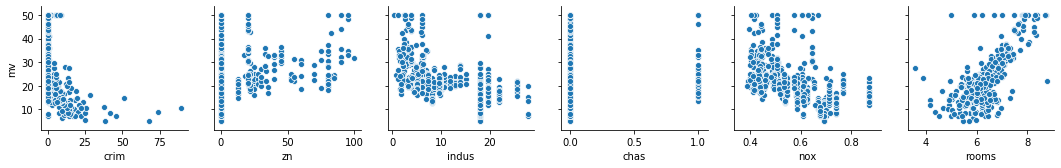

In [343]:
sns.pairplot(data=boston, y_vars=["mv"],x_vars=["crim","zn","indus","chas","nox","rooms"])

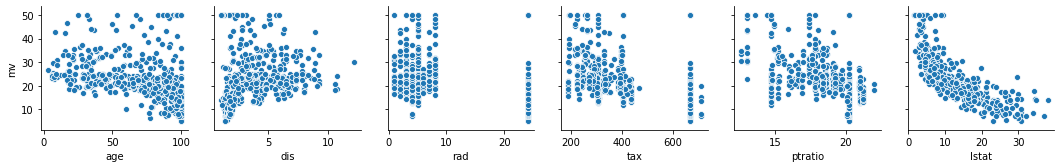

In [345]:
sns.pairplot(data=boston, y_vars=["mv"],x_vars=["age","dis","rad","tax","ptratio","lstat"])

Quick look at the data plotted linearly: Potential positive relationship between number of rooms, and negative relationship between lstat. Looks like chas is a binary variable. 

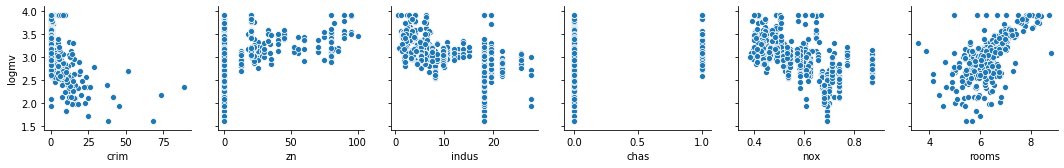

In [348]:
sns.pairplot(data=boston, y_vars=["logmv"],x_vars=["crim","zn","indus","chas","nox","rooms"])

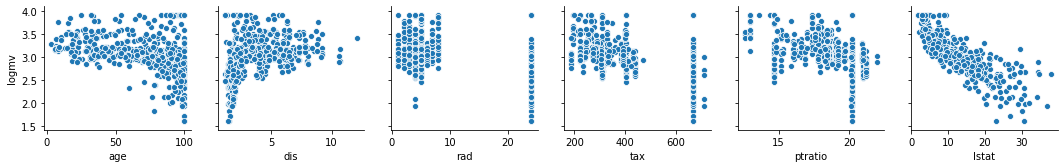

In [349]:
sns.pairplot(data=boston, y_vars=["logmv"],x_vars=["age","dis","rad","tax","ptratio","lstat"])

Looks like there is a clearer relationship between mv and lstat after the log transformation. 

In [350]:
#Look at correlation between variables.
corr=boston.corr()

In [351]:
corr

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logmv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.389582,-0.530001
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360386,0.363396
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.484754,-0.543195
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175663,0.158569
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.429300,-0.513431
rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.696304,0.632536
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.377999,-0.455029
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249315,0.342527
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.384766,-0.486818
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.471979,-0.566214


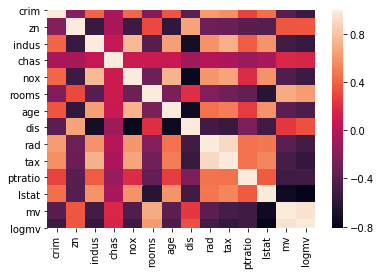

In [110]:
sns.heatmap(corr)

High positive correlations: mv and rooms (r=.696)
High negative correlations: my and indus (r=-.485), mv and ptratio (r=-.506), and mv and lstat (r=-.741)

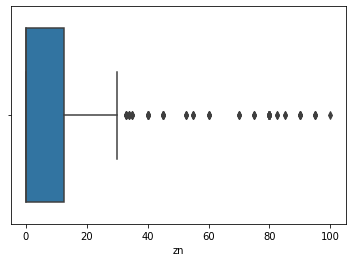

In [27]:
#Looking at a few features at the individual level in terms of range and outliers.
sns.boxplot(boston.zn)

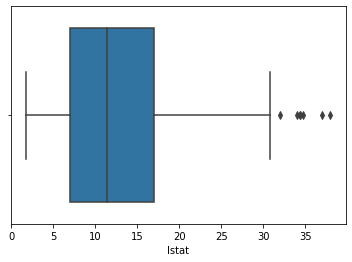

In [28]:
sns.boxplot(boston.lstat)

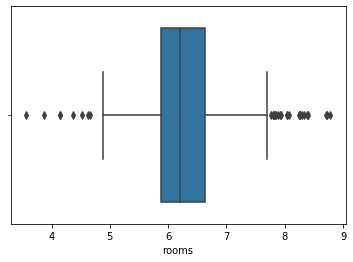

In [29]:
sns.boxplot(boston.rooms)

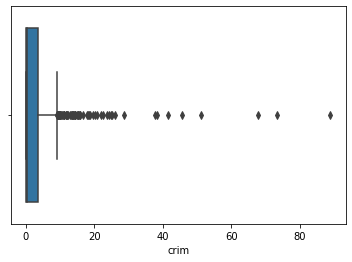

In [30]:
sns.boxplot(boston.crim)

In [352]:
#Split data into train and test sets
train_set, test_set=train_test_split(boston, test_size=.3,random_state=1)
print(train_set.shape)
print(test_set.shape)

(354, 14)
(152, 14)


In [353]:
# standardize scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(train_set))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[3.74292901e+00 1.13658192e+01 1.13053672e+01 8.47457627e-02
 5.55289831e-01 6.25343220e+00 6.88903955e+01 3.82747740e+00
 9.67796610e+00 4.09016949e+02 1.84511299e+01 1.29618362e+01
 2.23355932e+01 3.02761955e+00]
[8.51249918e+00 2.34995718e+01 6.85002462e+00 2.78502995e-01
 1.17857260e-01 6.91682826e-01 2.82289533e+01 2.13428315e+00
 8.78964596e+00 1.69973061e+02 2.14406588e+00 7.26807435e+00
 8.98742240e+00 4.04396817e-01]


In [354]:
# the model data will be standardized form of preliminary model data
train_set_t = scaler.transform(train_set)
test_set_t=scaler.transform(test_set)

In [555]:
X_train_set=train_set_t[0:354,0:12]
y_train_set=train_set_t[0:354,12:13]
X_test_set=test_set_t[0:152,0:12]
y_test_set=test_set_t[0:152,12:13]
print(X_train_set.shape, y_train_set.shape, X_test_set.shape, y_test_set.shape)

(354, 12) (354, 1) (152, 12) (152, 1)


In [469]:
clf=LinearRegression(fit_intercept=True)
clf.fit(X_train_set, y_train_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [470]:
rmse=np.sqrt(mean_squared_error(y_train_set, clf.predict(X_train_set)))
rmse_test = np.sqrt(mean_squared_error(y_test_set, clf.predict(X_test_set)))

In [471]:
print("rmse=",rmse)
print("rmse_test=",rmse_test)

rmse= 0.5357185930843503
rmse_test= 0.508310287088234


In [472]:
k=[0.01,0.1,1,10, 100, 500, 1000]

In [474]:
for i in k:
    ridge=Ridge(alpha=i)
    ridge.fit(X_train_set,y_train_set)
    rmse=sqrt(mean_squared_error(y_train_set, ridge.predict(X_train_set)))
    rmse_test =sqrt(mean_squared_error(y_test_set, ridge.predict(X_test_set)))
    print("For a=",i,"rmse=","{0:.5f}".format(rmse))  
    print("For a=",i,"rmse_test=","{0:.5f}".format(rmse_test))  

For a= 0.01 rmse= 0.53572
For a= 0.01 rmse_test= 0.50831
For a= 0.1 rmse= 0.53572
For a= 0.1 rmse_test= 0.50827
For a= 1 rmse= 0.53575
For a= 1 rmse_test= 0.50797
For a= 10 rmse= 0.53766
For a= 10 rmse_test= 0.50824
For a= 100 rmse= 0.56801
For a= 100 rmse_test= 0.55097
For a= 500 rmse= 0.65614
For a= 500 rmse_test= 0.68593
For a= 1000 rmse= 0.71794
For a= 1000 rmse_test= 0.76777


In [473]:
for i in k:
    lasso=Lasso(alpha=i)
    lasso.fit(X_train_set,y_train_set)
    rmse=sqrt(mean_squared_error(y_train_set, lasso.predict(X_train_set)))
    rmse_test =sqrt(mean_squared_error(y_test_set, lasso.predict(X_test_set)))
    print("For a=",i,"rmse=","{0:.5f}".format(rmse), "# of features=", np.sum(lasso.coef_ != 0))
    print("For a=",i,"rmse_tst=","{0:.5f}".format(rmse_test), "# of features=", np.sum(lasso.coef_ != 0))

For a= 0.01 rmse= 0.54102 # of features= 10
For a= 0.01 rmse_tst= 0.51561 # of features= 10
For a= 0.1 rmse= 0.59948 # of features= 4
For a= 0.1 rmse_tst= 0.60249 # of features= 4
For a= 1 rmse= 1.00000 # of features= 0
For a= 1 rmse_tst= 1.06795 # of features= 0
For a= 10 rmse= 1.00000 # of features= 0
For a= 10 rmse_tst= 1.06795 # of features= 0
For a= 100 rmse= 1.00000 # of features= 0
For a= 100 rmse_tst= 1.06795 # of features= 0
For a= 500 rmse= 1.00000 # of features= 0
For a= 500 rmse_tst= 1.06795 # of features= 0
For a= 1000 rmse= 1.00000 # of features= 0
For a= 1000 rmse_tst= 1.06795 # of features= 0


In [475]:
X_train_set=train_set_t[0:354,0:12]
y_train_set=train_set_t[0:354,13:14]
X_test_set=test_set_t[0:152,0:12]
y_test_set=test_set_t[0:152,13:14]
print(X_train_set.shape, y_train_set.shape, X_test_set.shape, y_test_set.shape)

(354, 12) (354, 1) (152, 12) (152, 1)


In [476]:
clf=LinearRegression(fit_intercept=True)
clf.fit(X_train_set, y_train_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [477]:
rmse=np.sqrt(mean_squared_error(y_train_set, clf.predict(X_train_set)))
rmse_test = np.sqrt(mean_squared_error(y_test_set, clf.predict(X_test_set)))

In [478]:
print("rmse=",rmse)
print("rmse_test=",rmse_test)

rmse= 0.46759938937363865
rmse_test= 0.47210351153167196


In [479]:
k=[0.01,0.1,1,10, 100, 500, 1000]

In [480]:
for i in k:
    lasso=Lasso(alpha=i)
    lasso.fit(X_train_set,y_train_set)
    rmse=sqrt(mean_squared_error(y_train_set, lasso.predict(X_train_set)))
    rmse_test =sqrt(mean_squared_error(y_test_set, lasso.predict(X_test_set)))
    print("For a=",i,"rmse=","{0:.5f}".format(rmse), "# of features=", np.sum(lasso.coef_ != 0))
    print("For a=",i,"rmse_tst=","{0:.5f}".format(rmse_test), "# of features=", np.sum(lasso.coef_ != 0))

For a= 0.01 rmse= 0.47410 # of features= 10
For a= 0.01 rmse_tst= 0.47461 # of features= 10
For a= 0.1 rmse= 0.53268 # of features= 5
For a= 0.1 rmse_tst= 0.53906 # of features= 5
For a= 1 rmse= 1.00000 # of features= 0
For a= 1 rmse_tst= 1.02880 # of features= 0
For a= 10 rmse= 1.00000 # of features= 0
For a= 10 rmse_tst= 1.02880 # of features= 0
For a= 100 rmse= 1.00000 # of features= 0
For a= 100 rmse_tst= 1.02880 # of features= 0
For a= 500 rmse= 1.00000 # of features= 0
For a= 500 rmse_tst= 1.02880 # of features= 0
For a= 1000 rmse= 1.00000 # of features= 0
For a= 1000 rmse_tst= 1.02880 # of features= 0


In [481]:
for i in k:
    ridge=Ridge(alpha=i)
    ridge.fit(X_train_set,y_train_set)
    rmse=sqrt(mean_squared_error(y_train_set, ridge.predict(X_train_set)))
    rmse_test =sqrt(mean_squared_error(y_test_set, ridge.predict(X_test_set)))
    print("For a=",i,"rmse=","{0:.5f}".format(rmse))  
    print("For a=",i,"rmse_test=","{0:.5f}".format(rmse_test))  

For a= 0.01 rmse= 0.46760
For a= 0.01 rmse_test= 0.47210
For a= 0.1 rmse= 0.46760
For a= 0.1 rmse_test= 0.47203
For a= 1 rmse= 0.46764
For a= 1 rmse_test= 0.47140
For a= 10 rmse= 0.47008
For a= 10 rmse_test= 0.46910
For a= 100 rmse= 0.50655
For a= 100 rmse_test= 0.49823
For a= 500 rmse= 0.60096
For a= 500 rmse_test= 0.61141
For a= 1000 rmse= 0.66648
For a= 1000 rmse_test= 0.68798


In [556]:
lr=LinearRegression()
lr.fit(X_train_set,y_train_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [557]:
r=Ridge(alpha=1)
r.fit(X_train_set,y_train_set)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [558]:
l=Lasso(alpha=.01)
l.fit(X_train_set,y_train_set)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [559]:
l.coef_

array([-0.06933537,  0.10850707, -0.        ,  0.07981825, -0.22959993,
        0.22252545,  0.        , -0.29903267,  0.10853753, -0.05726584,
       -0.21309666, -0.47110449])

In [563]:
lr.coef_=np.reshape(lr.coef_, (12,))
r.coef_=np.reshape(r.coef_, (12,))
l.coef_=np.reshape(l.coef_, (12,))

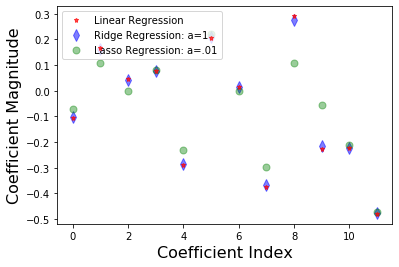

In [564]:
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(r.coef_,alpha=0.5,linestyle='none',marker='d',markersize=8,color='blue',label=r'Ridge Regression: a=1') # alpha here is for transparency
plt.plot(l.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Lasso Regression: a=.01')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(loc=2)
plt.show()

In [565]:
df=pd.DataFrame([lr.coef_,r.coef_,l.coef_])

In [566]:
df.columns=['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','pratio','lstat']

In [567]:
df.index=['Linear','Ridge','Lasso']

In [568]:
df

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,pratio,lstat
Linear,-0.104935,0.166878,0.044533,0.077741,-0.290154,0.206719,0.014588,-0.374170,0.290516,-0.228466,-0.224549,-0.480284
Ridge,-0.103325,0.162658,0.040051,0.078447,-0.284852,0.208688,0.013075,-0.368200,0.277332,-0.215752,-0.223546,-0.477448
Lasso,-0.069335,0.108507,-0.000000,0.079818,-0.229600,0.222525,0.000000,-0.299033,0.108538,-0.057266,-0.213097,-0.471104


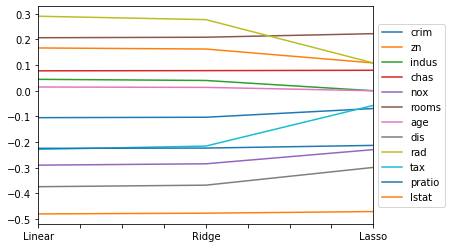

In [569]:
df.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [570]:
X_train_set=train_set_t[0:354,0:12]
y_train_set=train_set_t[0:354,13:14]
X_test_set=test_set_t[0:152,0:12]
y_test_set=test_set_t[0:152,13:14]
print(X_train_set.shape, y_train_set.shape, X_test_set.shape, y_test_set.shape)

(354, 12) (354, 1) (152, 12) (152, 1)


In [571]:
lr=LinearRegression()
lr.fit(X_train_set,y_train_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [572]:
r=Ridge(alpha=1)
r.fit(X_train_set,y_train_set)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [573]:
l=Lasso(alpha=.01)
l.fit(X_train_set,y_train_set)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [574]:
lr.coef_=np.reshape(lr.coef_, (12,))
r.coef_=np.reshape(r.coef_, (12,))
l.coef_=np.reshape(l.coef_, (12,))

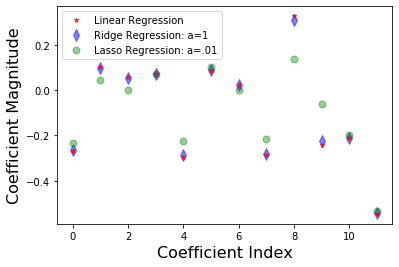

In [575]:
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(r.coef_,alpha=0.5,linestyle='none',marker='d',markersize=8,color='blue',label=r'Ridge Regression: a=1') # alpha here is for transparency
plt.plot(l.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Lasso Regression: a=.01')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(loc=2)
plt.show()

In [576]:
df=pd.DataFrame([lr.coef_,r.coef_,l.coef_])

In [577]:
df.columns=['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','pratio','lstat']
df.index=['Linear','Ridge','Lasso']
df

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,pratio,lstat
Linear,-0.267344,0.102971,0.057172,0.070305,-0.293395,0.084947,0.023508,-0.287629,0.325679,-0.240513,-0.213422,-0.546776
Ridge,-0.264940,0.099182,0.052251,0.071082,-0.288064,0.087755,0.021311,-0.282756,0.310850,-0.226930,-0.212048,-0.543147
Lasso,-0.232138,0.042366,-0.000000,0.072939,-0.226582,0.101547,0.000000,-0.217933,0.137727,-0.060569,-0.200473,-0.533437


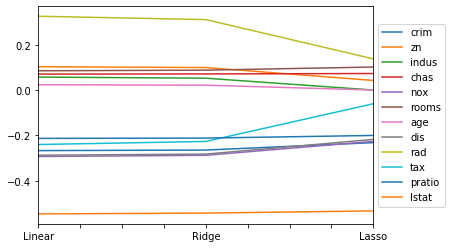

In [578]:
df.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))